In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = 'https://drive.google.com/uc?id=1US0luOWPOeVPpUQnpyxr41zrBmeg4Gjk&export=download'
df = pd.read_csv(file_path, sep=',')


In [3]:
df.head(10)

,message,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,is upset that he can't update his Facebook by ...,1
2,@Kenichan I dived many times for the ball. Man...,1
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",1
5,@Kwesidei not the whole crew,1
6,Need a hug,1
7,@LOLTrish hey long time no see! Yes.. Rains a...,1
8,@Tatiana_K nope they didn't have it,1
9,@twittera que me muera ?,1


DISTRIBUTION DES CLASSES

In [4]:
print(df['label'].value_counts())

label
1    53855
0     6145
Name: count, dtype: int64


DISTRIBUTION DU DATASET

In [5]:
print(df.describe())

              label
count  60000.000000
mean       0.897583
std        0.303198
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  60000 non-null  object
 1   label    60000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.6+ KB
None


PRE-TRAITEMENT

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#download ntlk ressources

nltk.download('stopwords')
nltk.download('wordnet')

# Suppression des caractères spéciaux, conversion en minuscules, suppression des stop words
stop_words = set(stopwords.words('english'))  # Remplacez par votre langue cible
lemmatizer = WordNetLemmatizer() #stemming

def clean_text(text):
    text = str(text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Supprimer les caractères spéciaux
    text = text.lower()  # Convertir en minuscules
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Lemmatization
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text



[nltk_data] Downloading package stopwords to C:\Users\MSI KATANA
[nltk_data]     B13V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MSI KATANA
[nltk_data]     B13V\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df['cleaned_message'] = df['message'].apply(clean_text)  # Remplacez 'text' par la colonne correspondante

In [9]:
df.head(10)

,message,label,cleaned_message
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,switchfoot httptwitpiccomyzl awww thats bummer...
1,is upset that he can't update his Facebook by ...,1,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,1,kenichan dived many time ball managed save res...
3,my whole body feels itchy and like its on fire,0,whole body feel itchy like fire
4,"@nationwideclass no, it's not behaving at all....",1,nationwideclass behaving im mad cant see
5,@Kwesidei not the whole crew,1,kwesidei whole crew
6,Need a hug,1,need hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,1,loltrish hey long time see yes rain bit bit lo...
8,@Tatiana_K nope they didn't have it,1,tatianak nope didnt
9,@twittera que me muera ?,1,twittera que muera


Tokenization

In [10]:
# Tokeniser chaque message (séparer par les espaces)
tweets_tokenized = df['cleaned_message'].apply(lambda x: x.split())

Embeddings

In [11]:
tweets_tokenized

0        [switchfoot, httptwitpiccomyzl, awww, thats, b...
1        [upset, cant, update, facebook, texting, might...
2        [kenichan, dived, many, time, ball, managed, s...
3                   [whole, body, feel, itchy, like, fire]
4          [nationwideclass, behaving, im, mad, cant, see]
                               ...                        
59995    [really, want, go, see, zac, efron, amazingly,...
59996                                      [krissa, thank]
59997                                           [dreaming]
59998        [theellenshow, saw, clip, online, good, show]
59999                  [msdivineknight, k, hun, worry, xx]
Name: cleaned_message, Length: 60000, dtype: object

In [12]:
from gensim.models import Word2Vec

#tweets_tokenized = df['cleaned_message']
model = Word2Vec(sentences=tweets_tokenized, vector_size=100, window=5, min_count=1)
print(model.wv.index_to_key)  # Vecteur pour 'tweet'


['im', 'day', 'good', 'get', 'go', 'like', 'work', 'today', 'going', 'time', 'dont', 'cant', 'love', 'back', 'got', 'u', 'one', 'know', 'lol', 'night', 'want', 'really', 'well', 'see', 'still', 'think', 'twitter', 'need', 'new', 'home', 'morning', 'thanks', 'amp', 'last', 'much', 'oh', 'tomorrow', 'great', 'hope', 'feel', 'make', 'wish', 'sleep', 'fun', 'ill', 'thats', 'miss', 'would', 'come', 'didnt', 'bed', 'nice', 'haha', 'thing', 'sad', 'week', 'getting', 'right', 'bad', 'tonight', 'though', 'way', 'sorry', 'friend', 'ive', 'look', 'watching', 'school', 'better', 'happy', 'could', 'people', 'hour', 'gonna', 'say', 'youre', 'hate', 'wait', 'yeah', 'even', 'show', 'take', 'yes', 'guy', 'hey', 'working', 'next', 'sick', 'tweet', 'never', 'first', 'feeling', 'awesome', 'soon', 'best', 'let', 'little', 'long', 'life', 'thank', 'tired', 'weekend', 'done', 'ok', 'watch', 'something', 'lot', 'please', 'made', 'ready', 'keep', 'looking', 'year', 'find', 'everyone', 'another', 'always', 'gir

Vérification du nombre de dimensions

In [13]:
# Vérifier les dimensions des vecteurs de tout le vocabulaire
word_vectors = model.wv  # Accéder aux vecteurs des mots
dimensions = set(len(word_vectors[word]) for word in word_vectors.index_to_key)
print("Dimensions uniques dans le modèle :", dimensions)


Dimensions uniques dans le modèle : {100}


Construsction du modèle

In [14]:
# Distribution des classes
print(df['label'].value_counts())  # Remplacez 'label' par votre colonne cible


label
1    53855
0     6145
Name: count, dtype: int64


Application SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np

# Étape 1 : Filtrage des tweets vides ou hors vocabulaire
# Garder uniquement les lignes avec des tokens valides
filtered_tweets = []
filtered_labels = []

for tokens, label in zip(tweets_tokenized, df['label']):
    if len(tokens) > 0:  # Vérifie si des tokens existent
        filtered_tokens = [word for word in tokens if word in model.wv.index_to_key]
        if len(filtered_tokens) > 0:  # Vérifie si des tokens sont dans le vocabulaire
            filtered_tweets.append(filtered_tokens)
            filtered_labels.append(label)

# Étape 2 : Générer les vecteurs moyens pour les tweets filtrés
X = [model.wv.get_mean_vector(tokens) for tokens in filtered_tweets]
y = np.array(filtered_labels)  # Convertir les labels en numpy array

# Étape 3 : Diviser les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 4 : Appliquer SMOTE sur les données d'entraînement uniquement
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [16]:
# Vérification de la distribution des classes après SMOTE
from collections import Counter
print("Distribution des classes après SMOTE :", Counter(y_resampled))

Distribution des classes après SMOTE : Counter({1: 43046, 0: 43046})


SELECTION DES MODELES

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Entraîner le modèle
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_resampled, y_resampled)

# Évaluer sur l'ensemble de test
y_pred_lr = clf_lr.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.14      0.60      0.22      1202
           1       0.93      0.57      0.71     10796

    accuracy                           0.58     11998
   macro avg       0.53      0.59      0.46     11998
weighted avg       0.85      0.58      0.66     11998



Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Entraîner le modèle
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_resampled, y_resampled)

# Évaluer sur l'ensemble de test
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20      1202
           1       0.91      0.91      0.91     10796

    accuracy                           0.84     11998
   macro avg       0.56      0.56      0.56     11998
weighted avg       0.84      0.84      0.84     11998



SVM (Support Vector Machine)

In [19]:
from sklearn.svm import SVC

# Entraîner le modèle
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_resampled, y_resampled)

# Évaluer sur l'ensemble de test
y_pred_svm = clf_svm.predict(X_test)
print("SVM Report:")
print(classification_report(y_test, y_pred_svm))


SVM Report:
              precision    recall  f1-score   support

           0       0.13      0.68      0.22      1202
           1       0.93      0.50      0.65     10796

    accuracy                           0.52     11998
   macro avg       0.53      0.59      0.43     11998
weighted avg       0.85      0.52      0.61     11998



Cross Validation (Random Forest)



In [20]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(clf_rf, X_resampled, y_resampled, cv=5, scoring='accuracy') # You can use other scoring metrics as well

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.90527905 0.93216795 0.93158323 0.92914392 0.92815658]
Average accuracy: 0.9252661465093948


Matrice de confusion (choix du random Forest)

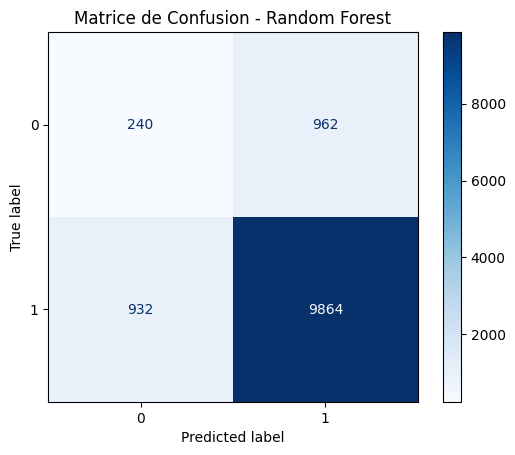

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Générer la matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Afficher la matrice de confusion
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp_rf.plot(cmap='Blues')
plt.title("Matrice de Confusion - Random Forest")
plt.show()


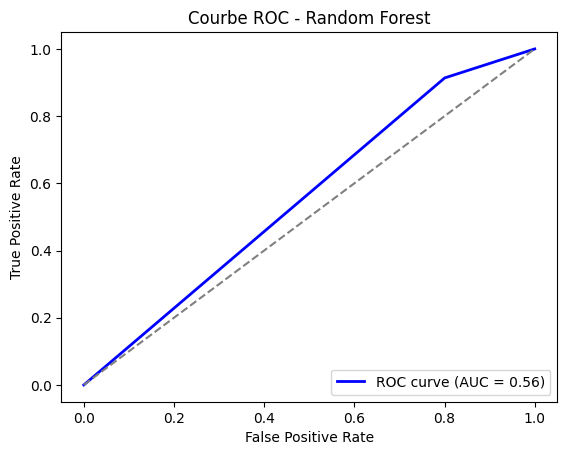

In [24]:
from sklearn.metrics import  roc_curve, auc
# Calculer les métriques pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Ligne de hasard
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


AJUSTEMENT DES HYPER PARAMETRES

In [26]:
from sklearn.model_selection import RandomizedSearchCV

# Définir l'espace de recherche des hyperparamètres
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=5, cv=3, scoring='accuracy', random_state=42, n_jobs=-1, verbose=1
)

# Exécuter la recherche d'hyperparamètres
random_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", random_search.best_params_)

# Utiliser le modèle optimisé
best_rf_model = random_search.best_estimator_

# Réévaluer le modèle optimisé
y_pred_best_rf = best_rf_model.predict(X_test)
print("Rapport de classification - Modèle Optimisé Random Forest:")
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Meilleurs paramètres: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Rapport de classification - Modèle Optimisé Random Forest:
              precision    recall  f1-score   support

           0       0.20      0.19      0.19      1202
           1       0.91      0.92      0.91     10796

    accuracy                           0.84     11998
   macro avg       0.56      0.55      0.55     11998
weighted avg       0.84      0.84      0.84     11998



SAVE THE MODEL

In [30]:
import joblib

# Sauvegarder le modèle dans le répertoire 'model'
joblib.dump(clf_rf, "model/random_forest_model.pkl")
print("Modèle sauvegardé sous 'model/random_forest_model.pkl'")


Modèle sauvegardé sous 'model/random_forest_model.pkl'


In [31]:
# Sauvegarder le modèle Word2Vec
model.save("model/word2vec.model")  # Chemin vers le fichier sauvegardé
print("Word2Vec sauvegardé sous 'model/word2vec.model'")

Word2Vec sauvegardé sous 'model/word2vec.model'
